## Melanoma Tumor size prediction

### Objective: TO build a machine learning model to predict tumore size using the tumor features 

#### What us Melanoma?
> Melanoma is a highly aggressive form of skin cancer arising from melanocytes, typically linked to UV exposure. Early detection through vigilant monitoring of changes in moles and skin pigmentation is pivotal for successful treatment, as advanced melanoma can metastasize to vital organs, significantly lowering survival rates. Treatment options encompass surgical excision for localized tumors, while advanced cases often necessitate adjuvant therapies like immunotherapy or targeted therapy. Preventive measures, including sun protection and regular skin checks, are paramount in reducing melanoma risk. Public awareness campaigns play a crucial role in promoting early detection and emphasizing the importance of sun safety practices.

> Accurate measurement of tumor size is crucial for diagnosis, treatment planning, and monitoring of cancer progression. Traditional methods often involve manual assessment by clinicians, which can be subjective and prone to variability. Challenges such as irregular tumor shapes, limited precision of measurement tools, and the invasive nature of some procedures further complicate the process. Automated techniques, including AI-based approaches, offer promising solutions by enhancing accuracy, reducing subjectivity, and streamlining the measurement process. These advancements have the potential to improve patient outcomes by enabling more precise treatment decisions and facilitating early detection of changes in tumor size.

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [251]:
#importing dataset

df_train = pd.read_csv("D:/ML data/Malanoma/train.csv")
df_test = pd.read_csv("D:/ML data/Malanoma/train.csv")
df_train

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.4870,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.8810,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.0930,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.0150,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.4140,3263.35,57,35.0200,18.023
...,...,...,...,...,...,...,...,...,...,...
9141,7250.25,3120.63,0.43041,82.0410,9.794768e+05,118.7710,3370.24,53,37.0260,13.127
9142,10145.00,3544.90,0.34942,90.1403,1.374393e+06,154.0270,5025.50,30,31.0565,17.091
9143,8086.10,1621.65,0.20054,78.5118,1.134257e+06,104.2840,3804.98,13,34.2739,1.971
9144,14418.90,6373.71,0.44203,84.0665,1.955398e+06,246.4450,19881.74,39,34.5885,17.749


In [252]:
df_test

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.4870,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.8810,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.0930,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.0150,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.4140,3263.35,57,35.0200,18.023
...,...,...,...,...,...,...,...,...,...,...
9141,7250.25,3120.63,0.43041,82.0410,9.794768e+05,118.7710,3370.24,53,37.0260,13.127
9142,10145.00,3544.90,0.34942,90.1403,1.374393e+06,154.0270,5025.50,30,31.0565,17.091
9143,8086.10,1621.65,0.20054,78.5118,1.134257e+06,104.2840,3804.98,13,34.2739,1.971
9144,14418.90,6373.71,0.44203,84.0665,1.955398e+06,246.4450,19881.74,39,34.5885,17.749


In [253]:
#verifying the dtype
df_train.dtypes

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
tumor_size        float64
dtype: object

In [254]:
df_test.dtypes

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
tumor_size        float64
dtype: object

In [255]:
#looking for the missing values
df_train.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [256]:
df_test.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

## EDA

#### Evaluating correlation between feature variables using the pairplot

c:\Users\willi\Documents\IBM_course\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


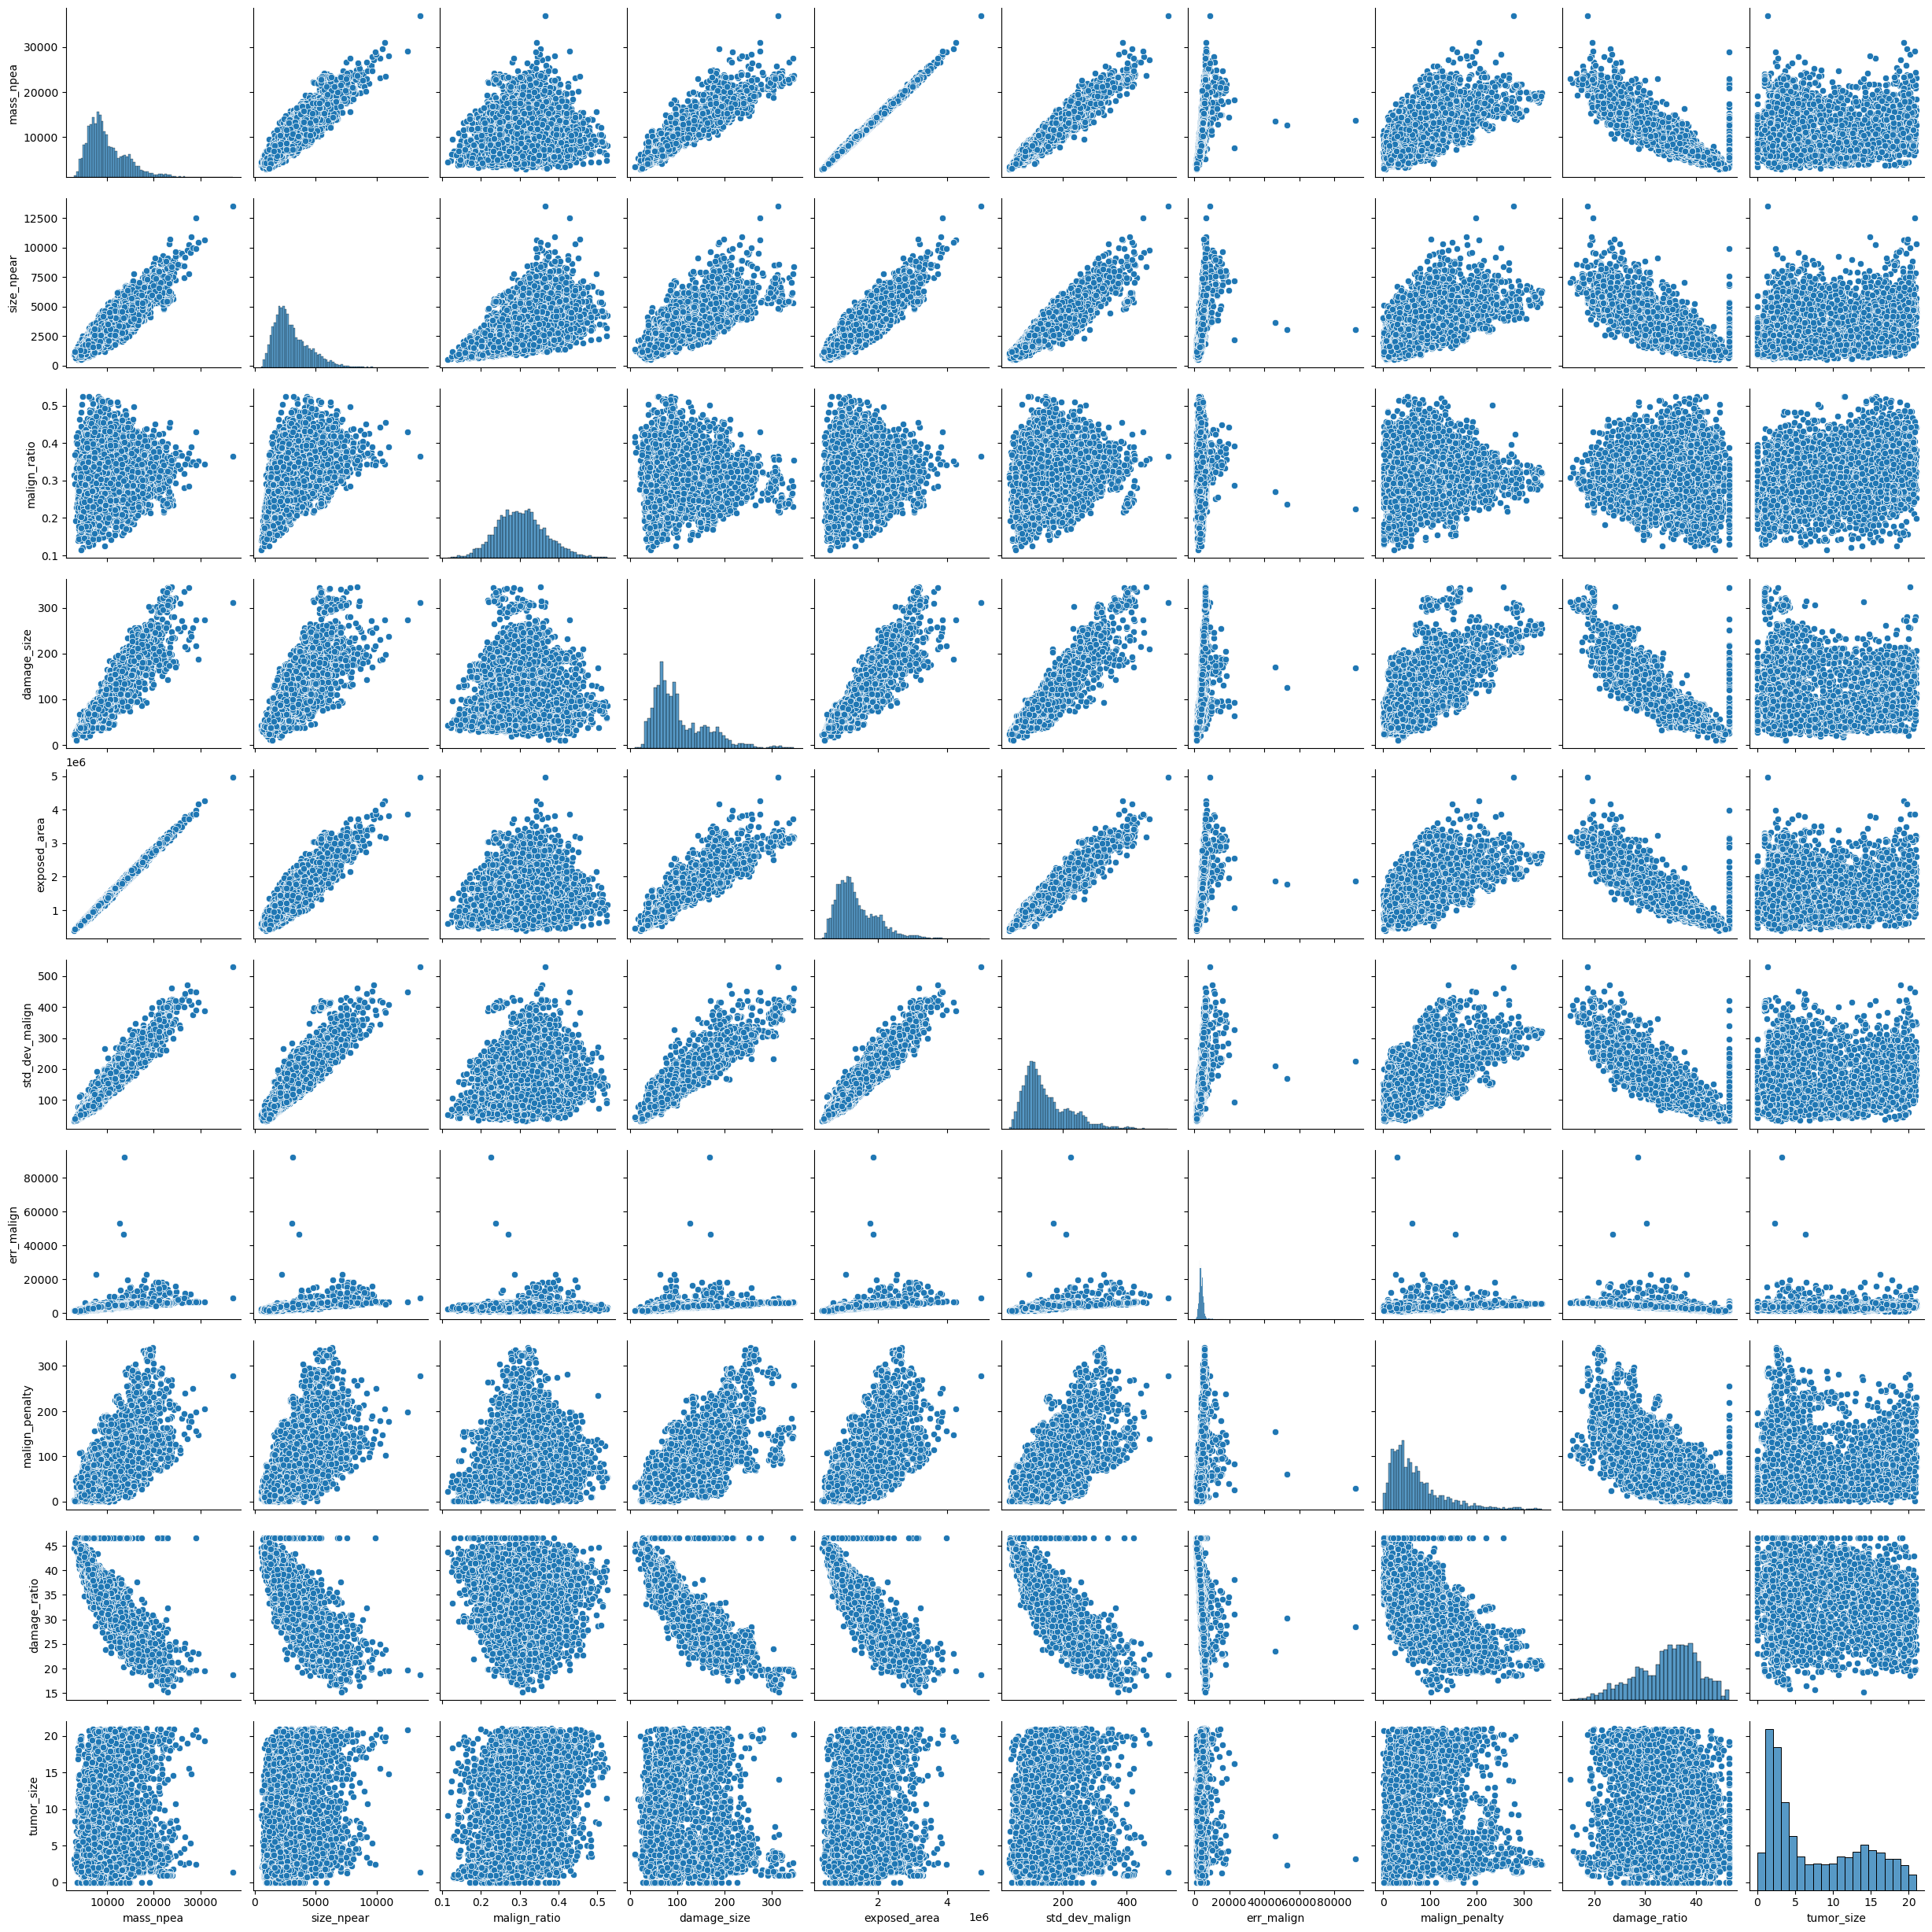

In [257]:
sns.pairplot(df_train)

In [258]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
mass_npea,9146.0,9.903052e+03,4060.577116,2864.76000,6988.420000,8.895965e+03,1.211995e+04,3.699540e+04
size_npear,9146.0,3.032828e+03,1462.334147,510.53000,1983.657500,2.684330e+03,3.830745e+03,1.353500e+04
malign_ratio,9146.0,3.030829e-01,0.062533,0.11482,0.259053,3.010550e-01,3.430025e-01,5.253000e-01
damage_size,9146.0,1.039021e+02,55.456862,10.31010,64.012525,8.845830e+01,1.342090e+02,3.464200e+02
exposed_area,9146.0,1.372442e+06,564677.287032,387853.40250,959687.264300,1.237057e+06,1.693083e+06,4.978616e+06
std_dev_malign,9146.0,1.463042e+02,70.512177,31.97040,95.853900,1.261385e+02,1.822515e+02,5.288900e+02
err_malign,9146.0,3.992936e+03,1780.672859,1089.19000,3177.682500,3.846320e+03,4.664577e+03,9.198370e+04
malign_penalty,9146.0,6.984966e+01,55.785332,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02
damage_ratio,9146.0,3.446165e+01,5.972808,15.22800,30.290225,3.524575e+01,3.880607e+01,4.654640e+01
tumor_size,9146.0,7.723348e+00,6.086852,0.00000,2.320000,5.060500e+00,1.333600e+01,2.099900e+01


In [259]:
#splitting data into train and test

x_train = df_train.drop("tumor_size", axis=1)
y_train = df_train["tumor_size"]

x_test = df_test.drop("tumor_size", axis=1)
y_test = df_test["tumor_size"]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9146, 9), (9146, 9), (9146,), (9146,))

## Building Model Without scaling the data

In [260]:
#Buidling the model 

model = Sequential()
model.add(layers.InputLayer(input_shape=(9,)))
model.add(layers.Dense(32, activation= "relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1))

In [261]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 32)                320       
                                                                 
 dense_56 (Dense)            (None, 64)                2112      
                                                                 
 dense_57 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [262]:
from keras import backend as K

def root_mean_squared_error(y_test, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_test)))

In [263]:
#compling the model
model.compile(optimizer = "adam",
             loss = "mae",
             metrics = [root_mean_squared_error])

In [264]:
#fitting the model

history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
286/286 [==============================] - 2s 2ms/step - loss: 3377.4988 - root_mean_squared_error: 3661.3188
Epoch 2/50
286/286 [==============================] - 1s 2ms/step - loss: 3126.2344 - root_mean_squared_error: 3392.8176
Epoch 3/50
286/286 [==============================] - 1s 2ms/step - loss: 2865.3306 - root_mean_squared_error: 3105.2476
Epoch 4/50
286/286 [==============================] - 1s 2ms/step - loss: 2497.0366 - root_mean_squared_error: 2704.7388
Epoch 5/50
286/286 [==============================] - 1s 2ms/step - loss: 1636.5905 - root_mean_squared_error: 1784.3140
Epoch 6/50
286/286 [==============================] - 1s 2ms/step - loss: 2164.9109 - root_mean_squared_error: 2340.1780
Epoch 7/50
286/286 [==============================] - 1s 2ms/step - loss: 2014.7866 - root_mean_squared_error: 2185.9949
Epoch 8/50
286/286 [==============================] - 1s 2ms/step - loss: 1776.8317 - root_mean_squared_error: 1924.1801
Epoch 9/50
286/286 [============

In [265]:
y_preds =model.predict(x_test)

286/286 [==============================] - 1s 2ms/step


In [266]:
y_preds

array([[ 614.8574 ],
       [1347.8511 ],
       [ 939.17773],
       ...,
       [ 748.7744 ],
       [1101.8188 ],
       [ 627.7124 ]], dtype=float32)

In [267]:
y_preds[0] - y_test[0]

array([600.7544], dtype=float32)

In [268]:
y_test[0]

14.103

## Building Model after scaling the data

In [269]:
### Applying scaling 
from sklearn.preprocessing import StandardScaler 

In [270]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

### Model 1

In [271]:
model1 = Sequential()
model1.add(layers.InputLayer(input_shape= (9,)))
model1.add(layers.Dense(64, activation="relu"))
model1.add(layers.Dense(128, activation="relu"))
model1.add(layers.Dense(1))

In [304]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 64)                640       
                                                                 
 dense_59 (Dense)            (None, 128)               8320      
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [272]:
model1.compile(optimizer ="adam",
                loss = "mae",
                metrics= ["mae"])

In [273]:
history = model1.fit(x_train_scaled, y_train, epochs=50)

Epoch 1/50
286/286 [==============================] - 2s 3ms/step - loss: 4.6517 - mae: 4.6517
Epoch 2/50
286/286 [==============================] - 1s 2ms/step - loss: 3.9374 - mae: 3.9374
Epoch 3/50
286/286 [==============================] - 1s 3ms/step - loss: 3.8016 - mae: 3.8016
Epoch 4/50
286/286 [==============================] - 1s 3ms/step - loss: 3.7377 - mae: 3.7377
Epoch 5/50
286/286 [==============================] - 1s 3ms/step - loss: 3.6867 - mae: 3.6867
Epoch 6/50
286/286 [==============================] - 1s 2ms/step - loss: 3.6497 - mae: 3.6497
Epoch 7/50
286/286 [==============================] - 1s 3ms/step - loss: 3.6330 - mae: 3.6330
Epoch 8/50
286/286 [==============================] - 1s 3ms/step - loss: 3.5943 - mae: 3.5943
Epoch 9/50
286/286 [==============================] - 1s 2ms/step - loss: 3.5654 - mae: 3.5654
Epoch 10/50
286/286 [==============================] - 1s 2ms/step - loss: 3.5420 - mae: 3.5420
Epoch 11/50
286/286 [============================

In [274]:
y_preds = model.predict(x_test_scaled)

286/286 [==============================] - 1s 2ms/step


In [275]:
y_preds

array([[0.07196587],
       [0.04724038],
       [0.11613876],
       ...,
       [0.20908464],
       [0.16237721],
       [0.173997  ]], dtype=float32)

In [276]:
y_test

0       14.103
1        2.648
2        1.688
3        3.796
4       18.023
         ...  
9141    13.127
9142    17.091
9143     1.971
9144    17.749
9145    14.103
Name: tumor_size, Length: 9146, dtype: float64

In [277]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

### Model 2

In [278]:
model2 = Sequential()
model2.add(layers.InputLayer(input_shape= (9,)))
model2.add(layers.Dense(64, activation="relu"))
model2.add(layers.Dense(128, activation="relu"))
model2.add(layers.Dense(256, activation="relu"))
model2.add(layers.Dense(1))

In [305]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 64)                640       
                                                                 
 dense_62 (Dense)            (None, 128)               8320      
                                                                 
 dense_63 (Dense)            (None, 256)               33024     
                                                                 
 dense_64 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42241 (165.00 KB)
Trainable params: 42241 (165.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [279]:
model2.compile(optimizer ="adam",
                loss = "mae",
                metrics= [root_mean_squared_error])

In [280]:
history = model2.fit(x_train_scaled, y_train, epochs=100)

Epoch 1/100
286/286 [==============================] - 3s 3ms/step - loss: 4.3206 - root_mean_squared_error: 5.7309
Epoch 2/100
286/286 [==============================] - 1s 3ms/step - loss: 3.8027 - root_mean_squared_error: 5.1092
Epoch 3/100
286/286 [==============================] - 1s 3ms/step - loss: 3.7179 - root_mean_squared_error: 5.0276
Epoch 4/100
286/286 [==============================] - 1s 3ms/step - loss: 3.6448 - root_mean_squared_error: 4.9555
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 3.5507 - root_mean_squared_error: 4.8614
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 3.5178 - root_mean_squared_error: 4.8192
Epoch 7/100
286/286 [==============================] - 1s 3ms/step - loss: 3.4612 - root_mean_squared_error: 4.7492
Epoch 8/100
286/286 [==============================] - 1s 3ms/step - loss: 3.3892 - root_mean_squared_error: 4.6679
Epoch 9/100
286/286 [==============================] - 1s 3ms/step - los

286/286 [==============================] - 1s 3ms/step - loss: 2.1320 - root_mean_squared_error: 3.3327
Epoch 72/100
286/286 [==============================] - 1s 3ms/step - loss: 2.1012 - root_mean_squared_error: 3.3173
Epoch 73/100
286/286 [==============================] - 1s 3ms/step - loss: 2.1042 - root_mean_squared_error: 3.3075
Epoch 74/100
286/286 [==============================] - 1s 3ms/step - loss: 2.0945 - root_mean_squared_error: 3.2983
Epoch 75/100
286/286 [==============================] - 1s 3ms/step - loss: 2.1007 - root_mean_squared_error: 3.2836
Epoch 76/100
286/286 [==============================] - 1s 3ms/step - loss: 2.0882 - root_mean_squared_error: 3.2770
Epoch 77/100
286/286 [==============================] - 1s 3ms/step - loss: 2.0708 - root_mean_squared_error: 3.2652
Epoch 78/100
286/286 [==============================] - 1s 3ms/step - loss: 2.0704 - root_mean_squared_error: 3.2508
Epoch 79/100
286/286 [==============================] - 1s 3ms/step - loss: 2

In [281]:
y_preds = model2.predict(x_test_scaled)

286/286 [==============================] - 1s 2ms/step


In [282]:
y_preds

array([[12.484849 ],
       [ 3.1761973],
       [ 1.6209631],
       ...,
       [ 1.7923582],
       [16.82921  ],
       [10.723649 ]], dtype=float32)

In [284]:
# Access training loss values
loss_values = history.history['loss']

In [285]:
rmse_values = history.history["root_mean_squared_error"]
rmse_values

[5.730943202972412,
 5.10923433303833,
 5.027606964111328,
 4.955489158630371,
 4.86138391494751,
 4.819171905517578,
 4.749180793762207,
 4.667909622192383,
 4.634235858917236,
 4.599793434143066,
 4.536725044250488,
 4.492214202880859,
 4.453545093536377,
 4.389402389526367,
 4.368572235107422,
 4.327736854553223,
 4.299272060394287,
 4.253399848937988,
 4.237721920013428,
 4.222230911254883,
 4.173612594604492,
 4.1448283195495605,
 4.116054058074951,
 4.105827808380127,
 4.0980682373046875,
 4.048880100250244,
 4.032917499542236,
 4.014193058013916,
 3.9908230304718018,
 3.9495859146118164,
 3.9518892765045166,
 3.918125867843628,
 3.8933191299438477,
 3.904062032699585,
 3.8594117164611816,
 3.8219006061553955,
 3.822005271911621,
 3.790839433670044,
 3.785231351852417,
 3.770233392715454,
 3.7655673027038574,
 3.7465567588806152,
 3.743723154067993,
 3.710822582244873,
 3.6890549659729004,
 3.6916778087615967,
 3.6633291244506836,
 3.6608994007110596,
 3.642300605773926,
 3.61650

Text(0.5, 1.0, 'Epochs vs RMSE')

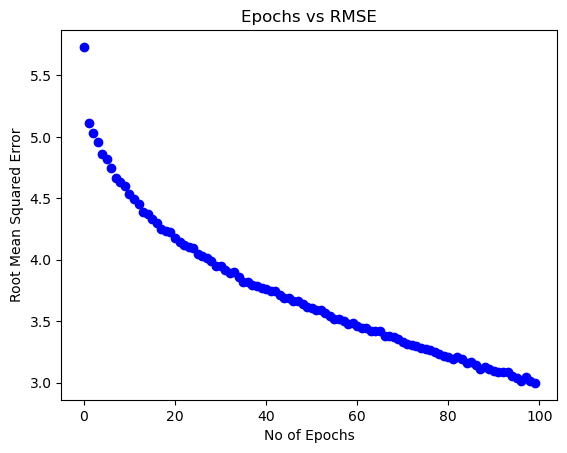

In [286]:
#plotting epoch vs rmse
plt.plot(rmse_values, 'bo')
plt.xlabel("No of Epochs")
plt.ylabel("Root Mean Squared Error")
plt.title("Epochs vs RMSE")

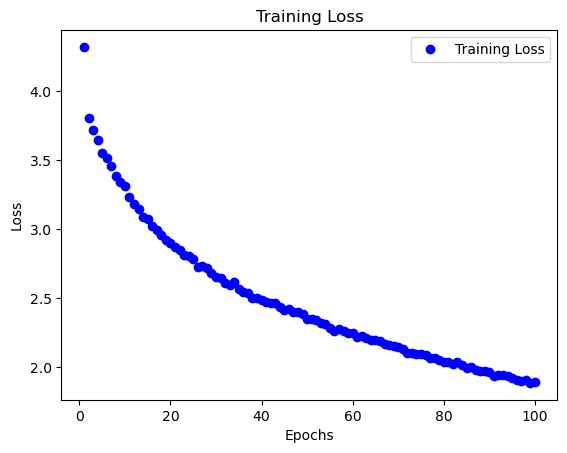

In [287]:
train_loss = history.history['loss']
# If validation data was provided during training, uncomment the line below
# val_loss = history.history['val_loss']

# Create a range of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training loss
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [288]:
y_diff = abs(np.ravel(y_preds)-np.array(y_test))
y_diff

array([1.61815102, 0.52819729, 0.0670369 , ..., 0.17864184, 0.91978972,
       3.37935098])

Text(0, 0.5, 'Size difference')

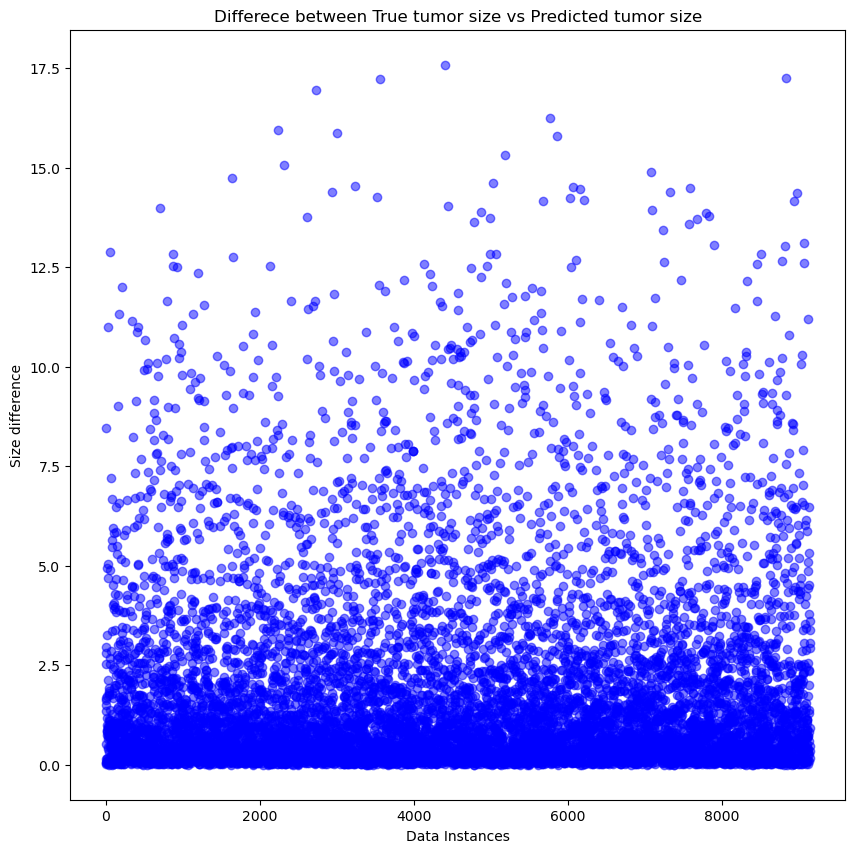

In [308]:
plt.figure(figsize=(10,10))
# plt.plot(y_test)
# plt.eplot(y_preds)

plt.plot(abs(y_diff), "o", color='blue', alpha=0.5)
plt.title("Differece between True tumor size vs Predicted tumor size")
plt.xlabel("Data Instances")
plt.ylabel("Size difference")

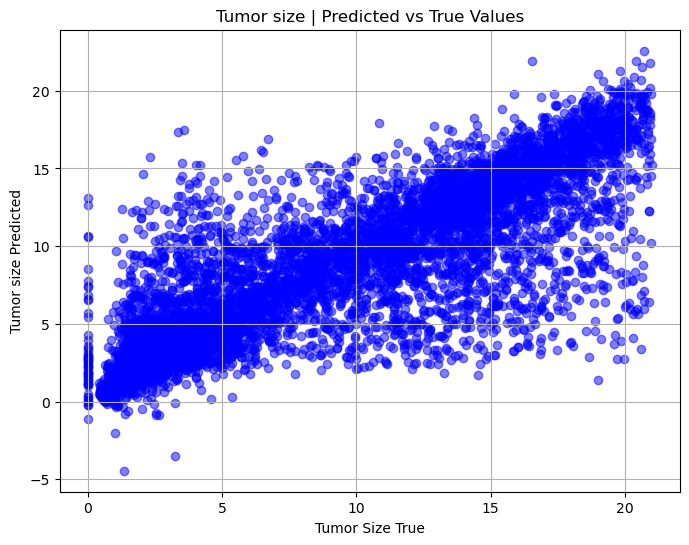

In [290]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds, color='blue', alpha=0.5)
plt.title('Tumor size | Predicted vs True Values')
plt.xlabel('Tumor Size True')
plt.ylabel('Tumor size Predicted')
plt.grid(True)
plt.show()

In [292]:
len(y_preds)

9146

In [301]:
df_export = pd.Series(np.ravel(y_preds))
df_export

0       12.484849
1        3.176197
2        1.620963
3        5.291719
4       18.033745
          ...    
9141    10.058585
9142    13.489077
9143     1.792358
9144    16.829210
9145    10.723649
Length: 9146, dtype: float32

In [302]:
df_export.to_csv("ridhdhesh_submission.csv")

## Conclusion: 

Through the Machine learning model we built, we can predict the tumor size with very high precision (when we compare to true values, it shows the very low difference between true and pedicted value). This model has still scope for improvements